<a href="https://colab.research.google.com/github/R2D2-like/deep-learning-from-scratch-4/blob/master/chap08/chap8_DQN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install gym

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [12]:
# Colab上では以下を実行してください
!apt-get install -y xvfb python-opengl > /dev/null 2>&1
!pip install gym pyvirtualdisplay > /dev/null 2>&1
!pip install JSAnimation

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for JSAnimation: filename=JSAnimation-0.1-py3-none-any.whl size=11424 sha256=c2a2e49f009fc23a583882f3551dee2ecdbf4d55131d004876bfaed64593961b
  Stored in directory: /root/.cache/pip/wheels/0e/4e/3d/05fb8cca2646ee0bbfbce17c40a970f48d5e0698b9e5aaa91f
Successfully built JSAnimation


In [13]:
# Colab上では以下を実行してください
from pyvirtualdisplay import Display
pydisplay = Display(visible=0, size=(400, 300))
pydisplay.start()

In [8]:
!pip install gym[classic_control]

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 18.3 MB 87 kB/s 


In [17]:
import numpy as np
import copy
from collections import deque
import gym
from gym import wrappers
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.distributions import Categorical, Normal
import matplotlib
import matplotlib.animation as animation
import matplotlib.pyplot as plt

from IPython import display
from JSAnimation.IPython_display import display_animation
from IPython.display import HTML

In [6]:
import gym 
env = gym.make('CartPole-v1')


In [15]:
import numpy as np 
import gym

env = gym
env = gym.make('CartPole-v1')
state = env.reset()
done = False

while not done:
  env.render(mode='rgb_array')
  action = np.random.choice([0,1])
  next_state, reward, done, info = env.step(action)

env.close()

/usr/local/lib/python3.7/dist-packages/gym/core.py:44: DeprecationWarning: WARN: The argument mode in render method is deprecated; use render_mode during environment initialization instead.
See here for more information: https://www.gymlibrary.ml/content/api/
  "The argument mode in render method is deprecated; "


In [21]:
env = gym.make('CartPole-v0')  # シミュレータ環境の構築
frames = []

state = env.reset()  # エピソードを開始（環境の初期化）
env.render()  # シミュレータ画面の出力
screen = env.render(mode='rgb_array')  # notebook上での結果の可視化用
frames.append(screen)
done = False
while not done:
    action = np.random.choice([0,1])
    next_state, reward, done, info = env.step(action)  # 行動を実行し、次の状態、 報酬、 終端か否かの情報を取得
    env.render()
    screen = env.render(mode='rgb_array')
    frames.append(screen)
env.close()  # 画面出力の終了

/usr/local/lib/python3.7/dist-packages/gym/envs/registration.py:594: UserWarning: WARN: The environment CartPole-v0 is out of date. You should consider upgrading to version `v1`.
  f"The environment {id} is out of date. You should consider "
/usr/local/lib/python3.7/dist-packages/gym/core.py:318: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  "Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future."
/usr/local/lib/python3.7/dist-packages/gym/wrappers/step_api_compatibility.py:40: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in futu

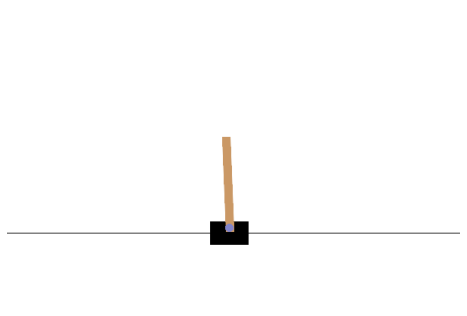

In [22]:
# 結果の確認
plt.figure(figsize=(frames[0].shape[1]/72.0, frames[0].shape[0]/72.0), dpi=72)
patch = plt.imshow(frames[0])
plt.axis('off')
  
def animate(i):
    patch.set_data(frames[i])
    
anim = animation.FuncAnimation(plt.gcf(), animate, frames=len(frames), interval=50)
HTML(anim.to_jshtml())